In [85]:
%matplotlib inline

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
#levantamos los csv

station = pd.read_csv('station.csv', low_memory=False)
trip_test = pd.read_csv('trip_test.csv', low_memory=False)
trip_train = pd.read_csv('trip_train.csv', low_memory=False)
weather = pd.read_csv('weather.csv', low_memory=False)
#status = pd.read_csv('status.csv', low_memory=False)

In [4]:
#vemos un poco los dataframes de cada csv
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [48]:
trip_train.head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,907649,396,8/27/2015 8:36,Harry Bridges Plaza (Ferry Building),50,8/27/2015 8:43,Embarcadero at Sansome,60,187,Subscriber,94602
1,384043,636,7/28/2014 22:06,Market at 10th,67,7/28/2014 22:17,Washington at Kearny,46,417,Subscriber,94133
2,316176,334,6/9/2014 8:42,Market at Sansome,77,6/9/2014 8:47,2nd at Folsom,62,281,Subscriber,94107
3,618874,666,1/26/2015 16:55,San Francisco Caltrain 2 (330 Townsend),69,1/26/2015 17:07,Temporary Transbay Terminal (Howard at Beale),55,634,Subscriber,94602
4,910977,318,8/29/2015 15:09,Market at 10th,67,8/29/2015 15:14,Powell Street BART,39,607,Subscriber,94709
5,522083,337,10/30/2014 7:00,Townsend at 7th,65,10/30/2014 7:06,San Francisco Caltrain (Townsend at 4th),70,370,Subscriber,94107
6,880809,394,8/7/2015 17:11,2nd at South Park,64,8/7/2015 17:17,2nd at Townsend,61,443,Subscriber,94107
7,488938,766,10/8/2014 14:10,Powell at Post (Union Square),71,10/8/2014 14:23,San Francisco Caltrain (Townsend at 4th),70,485,Subscriber,94107
8,899522,531,8/21/2015 7:53,2nd at Folsom,62,8/21/2015 8:02,San Francisco Caltrain (Townsend at 4th),70,603,Subscriber,94549
9,737380,267,4/23/2015 6:36,Market at 4th,76,4/23/2015 6:40,Mechanics Plaza (Market at Battery),75,86,Customer,21202


In [6]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [7]:
#status.head()

In [29]:
#vemos de que años son los registros   (2013, 2014,2015)  tal vez lo dice en kaggle pero por las dudas

print(trip_train['start_date'].str.contains('2011').value_counts())
print(trip_train['start_date'].str.contains('2012').value_counts())
print(trip_train['start_date'].str.contains('2013').value_counts())
print(trip_train['start_date'].str.contains('2014').value_counts())
print(trip_train['start_date'].str.contains('2015').value_counts())
print(trip_train['start_date'].str.contains('2016').value_counts())


False    549961
Name: start_date, dtype: int64
False    549961
Name: start_date, dtype: int64
False    467456
True      82505
Name: start_date, dtype: int64
False    282071
True     267890
Name: start_date, dtype: int64
False    350395
True     199566
Name: start_date, dtype: int64
False    549961
Name: start_date, dtype: int64


In [37]:
#promedio de duracion de viajes para cada año

sum = 0
count = trip_train[trip_train['start_date'].str.contains('2013')]['duration'].count()
idx =  (trip_train[trip_train['start_date'].str.contains('2013')])['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['start_date'].str.contains('2013')]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAnio2013 = sum / count

sum = 0
count = trip_train[trip_train['start_date'].str.contains('2014')]['duration'].count()
idx =  (trip_train[trip_train['start_date'].str.contains('2014')])['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['start_date'].str.contains('2014')]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAnio2014 = sum / count

sum = 0
count = trip_train[trip_train['start_date'].str.contains('2015')]['duration'].count()
idx =  (trip_train[trip_train['start_date'].str.contains('2015')])['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['start_date'].str.contains('2015')]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAnio2015 = sum / count

print(promedioAnio2013)
print(promedioAnio2014)
print(promedioAnio2015)

1318.468008
1142.30936952
989.85579708


<IPython.core.display.Javascript object>


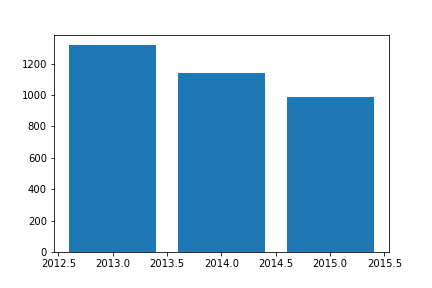

<Container object of 3 artists>

In [77]:
#graficamos el prmedio por año de duracion de viajes 
%matplotlib notebook
promediosAnios = [promedioAnio2013, promedioAnio2014, promedioAnio2015]
anios = [2013,2014,2015]
plt.bar(anios, promediosAnios)



In [58]:
#analizamos en que influye el ser costumer o subscriber respecto al uso de bicis o duration de viaje

trip_train['subscription_type'].value_counts()



Subscriber    465377
Customer       84584
Name: subscription_type, dtype: int64

In [61]:
sum = 0
count = trip_train[trip_train['subscription_type'] == 'Subscriber']['duration'].count()
idx =  trip_train[trip_train['subscription_type'] == 'Subscriber']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['subscription_type'] == 'Subscriber']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSubscriber = sum / count

sum = 0
count = trip_train[trip_train['subscription_type'] == 'Customer']['duration'].count()
idx =  trip_train[trip_train['subscription_type'] == 'Customer']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['subscription_type'] == 'Customer']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioCustomer = sum / count

#tla vez aca alla problema de la ecuacion de moivre 
print(promedioSubscriber)
print(promedioCustomer)

588.251312377
4002.84203868


<IPython.core.display.Javascript object>


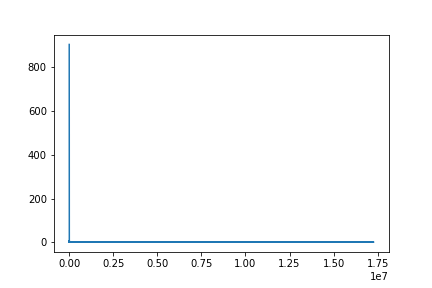

In [106]:
#graficamos la distribucion de la duracion de los viajes por año y entre los 3 
#%matplotlib notebook
#duration = trip_train[pd.to_numeric(trip_train.duration, errors = 'coerce').notnull()]['duration'].value_counts()
#idx = duration.index.tolist()

#plt.plot(duration)





In [154]:
#calculamos duracion promedio por dia de semana

#separamos la fecha por / y eliminamos todo lo q hay mas a la derecha del espacio despues del año
fechas = trip_train['start_date'].map(lambda x: (x.split('/')[0], x.split('/')[1], x.split('/')[2].split(' ')[0]))

#convertimos cada tupla de año mes dia a dia de semana ylo guardamos en un nuevo campo 
trip_train['weekday'] = fechas.map(lambda x: dt.date(int(x[2]),int(x[0]),int(x[1])).strftime("%A"))


Tuesday      100410
Wednesday     98407
Thursday      97751
Monday        95118
Friday        89915
Saturday      36773
Sunday        31587
Name: weekday, dtype: int64

<IPython.core.display.Javascript object>


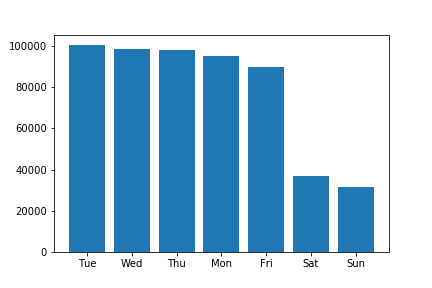

In [163]:
#grafico de viajes q se realizan cada dia de semana 
%matplotlib notebook

weekday_count = trip_train['weekday'].value_counts()
number = [0,1,2,3,4,5,6]
dias = ['Tue', 'Wed', 'Thu', 'Mon', 'Fri', 'Sat', 'Sun']
plt.bar(number, weekday_count)
plt.xticks(number, dias)
plt.show()

In [166]:
#duracion por dia de semana


sum = 0
count = trip_train[trip_train['weekday'] == 'Monday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Monday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Monday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioLunes = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Tuesday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Tuesday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Tuesday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMartes = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Wednesday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Wednesday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Wednesday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMiercoles = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Thursday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Thursday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Thursday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioJueves = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Friday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Friday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Friday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioViernes = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Saturday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Saturday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Saturday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSabado = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Sunday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Sunday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Sunday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioDomingo = sum / count
                       
print(promedioLunes)
print(promedioMartes)
print(promedioMiercoles)
print(promedioJueves)
print(promedioViernes)
print(promedioSabado)
print(promedioDomingo)             #habria q chequear estos datos al parecer los findes se viaja mas q el dia de semana. 
                                   #aunq tendria sentido pensando que en la semana se usa mucho para trabajar y el finde para pasear
                                   #y el viernes es mas alto porq se junta trabajo y un poquito de paseo
                       

845.199636241
813.614938751
823.866086762
879.890210842
1050.24347439
2935.45892367
2557.49631177


<IPython.core.display.Javascript object>


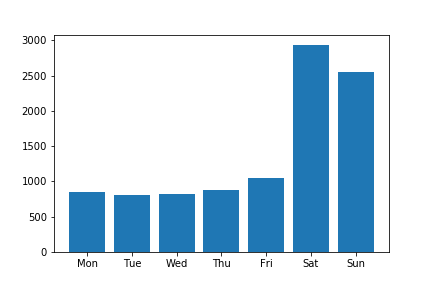

In [169]:
#graficamos los promedios de arriba 
%matplotlib notebook
promediosDias = [promedioLunes, promedioMartes, promedioMiercoles, promedioJueves, promedioViernes, promedioSabado, promedioDomingo]
number = [0,1,2,3,4,5,6]
dias = [ 'Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']
plt.bar(number, promediosDias)
plt.xticks(number, dias)
plt.show()